# B&K Mic Output Scale Calibration

### Routine for calibration of pressure values (Pa) from B&K mic recording (Audacity 32-bit normalized)

### *Section: acoustic effects of key closure in an instrument with no DC flow*

**Procedure**
- Use oscilloscope to manually record voltage of max peak in pulse
- Use known mic sensitivity to convert voltage to pressure value
- Record pulse in Audacity, amplitudes normalized to 32-bit scale
- Plot known pressure values against Audacity scale peaks
- Find linear fit of Audacity scale to pressure

**B&K mic sensitivity set at 10mv/Pa**

In [1]:
import audacity as au
import numpy as np
import scipy.io.wavfile as wf
import scipy.signal as sig
import matplotlib.pyplot as pl
%matplotlib notebook

In [2]:
def pressure_calib(aupfile):
    auf = au.Aup(aupfile)
    sr = auf.rate
    w = auf.get_channel_data(0)
    ann = auf.get_annotation_data()
    clips = [ w[int(ann[i]['start']*sr):int(ann[i]['end']*sr)] for i in range(len(ann)) ]
    peaks = [ np.amax(clips[j]) for j in range(len(ann))]
    Pa = [ float(ann[k]['label']) for k in range(len(ann))]
    return Pa, peaks

In [3]:
### Add filenames to recordings array as required

recordings = [ 'key_only_recordings/calibration/calib_%d.aup' %n for n in range(1, 3)]
pressure = []
bitscale = []
for rec in recordings:
    pressure.extend(pressure_calib(str(rec))[0])
    bitscale.extend(pressure_calib(str(rec))[1])

In [4]:
### Linear fit calculated using numpy polyfit

(ar,br) = np.polyfit(pressure,bitscale,1)
yr = np.polyval([ar,br],pressure)
err = np.sqrt(sum((yr-bitscale)**2)/len(bitscale))
ar

0.0027743005256476946

<IPython.core.display.Javascript object>


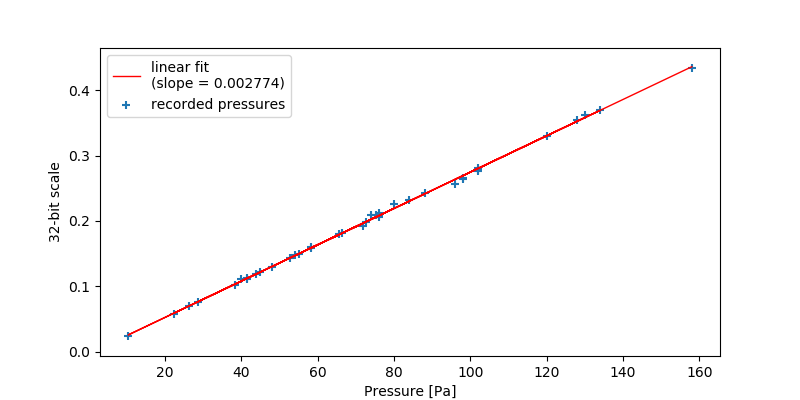

0.0027743005256476946

In [5]:
pl.figure('Key closing - pressure calibration', figsize=(8,4))
pl.scatter(pressure, bitscale, marker='+')
pl.plot(pressure, yr, 'r-', linewidth='1')
pl.legend(('linear fit \n(slope = %f)' %ar, 'recorded pressures'))
pl.xlabel('Pressure [Pa]')
pl.ylabel('32-bit scale')
ar

<IPython.core.display.Javascript object>


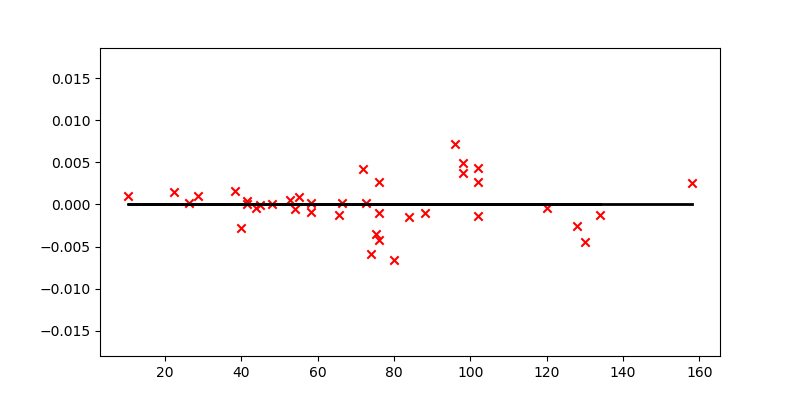

In [6]:
pl.figure('Residuals', figsize=(8,4))
pl.scatter(pressure, yr-bitscale, c='r', marker='x')
pl.plot(pressure, np.zeros(len(pressure)), 'k', linewidth='2')